This code analyzes Purple Air data and plots the average concentration of PM 2.5 at each location. This is specifically for the 14th. If you want to change it for the 15th, I'd recommend changing all of the df_14 to df_15 and changing location_order to include the locations of that dataframe instead of the locations from df_14. For the 14th, I had location_order in order from closest to the powerplant to furthest from the powerplant and I would recommend doing the same for the 15th to keep things consistent. Make sure you have the latest version of Purple_Air_14.csv and Purple_Air_15.csv downloaded from the Google Drive to ensure you have the csv file that includes Location.

Created by Emma Hietpas on 11/1/2024

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_14 = pd.read_csv('Purple_Air_14.csv')

In [3]:
df_15 = pd.read_csv('Purple_Air_15.csv')

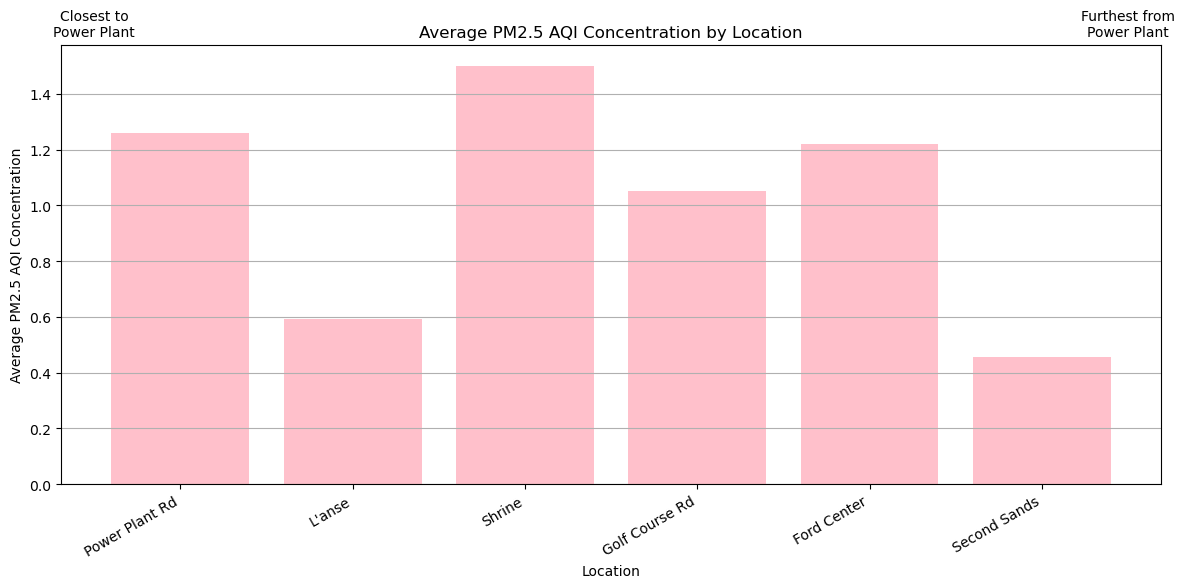

In [4]:
# rename L'anse so it has an apostrophe 
df_14['Location'] = df_14['Location'].replace({'Lanse': "L'anse"})
# find average of each location
location_summary = df_14.groupby('Location')['pm2.5_aqi_atm_b'].mean().reset_index()

# looked up how far away each location was from the power plant, put in order closest to furthest
location_order = ['Power Plant Rd', "L'anse", 'Shrine', 'Golf Course Rd', 'Ford Center', 'Second Sands']

location_summary['Location'] = pd.Categorical(location_summary['Location'], categories=location_order, ordered=True)
location_summary = location_summary.sort_values('Location')

plt.figure(figsize=(12, 6))
plt.bar(location_summary['Location'], location_summary['pm2.5_aqi_atm_b'], color='pink')
plt.title('Average PM2.5 AQI Concentration by Location')
plt.xlabel('Location')
plt.ylabel('Average PM2.5 AQI Concentration')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y')

# added "Closest to" and "Furthest from" labels on the plot, can delete if deemed unnecessary
plt.text(-0.5, max(location_summary['pm2.5_aqi_atm_b']) * 1.1, "Closest to\nPower Plant", 
         fontsize=10, ha='center', va='center')
plt.text(len(location_order) - 0.5, max(location_summary['pm2.5_aqi_atm_b']) * 1.1, "Furthest from\nPower Plant", 
         fontsize=10, ha='center', va='center')

plt.tight_layout()
plt.show()